In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [71]:

file_link = 'https://drive.google.com/file/d/1V_DHBWhKWsJP3Y-4bdpor81VY5xM2ny1/view?usp=sharing'
id = file_link.split("/")[-2]

new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# **EDA**

In [72]:
df.shape

(1977, 39)

In [73]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print()
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['1. Age', '2. Gender', '3. University', '4. Department', '5. Academic Year', '6. Current CGPA', '7. Did you receive a waiver or scholarship at your university?', 'Anxiety Label', 'Stress Label', 'Depression Label']

Numerical Variables:
['1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ', '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ', '3. In a semester, how often have you had trouble relaxing due to academic pressure? ', '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?', '5. In a semester, how often have you worried too much about academic affairs? ', '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?', '7. In a semester, how often have you felt afraid, as if something awful might happen?', 'Anxiety Value', '1. In a semester, how often have you felt upset due 

In [74]:
# Transposed stats for categorical features
cat_cols = df.select_dtypes(include='number')
cat_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",1977.0,1.770359,0.951704,0.0,1.0,2.0,3.0,3.0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",1977.0,1.629236,1.028252,0.0,1.0,2.0,3.0,3.0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",1977.0,1.747092,0.996336,0.0,1.0,2.0,3.0,3.0
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",1977.0,1.777441,0.966041,0.0,1.0,2.0,3.0,3.0
"5. In a semester, how often have you worried too much about academic affairs?",1977.0,1.859383,0.982362,0.0,1.0,2.0,3.0,3.0
"6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?",1977.0,1.787557,0.993087,0.0,1.0,2.0,3.0,3.0
"7. In a semester, how often have you felt afraid, as if something awful might happen?",1977.0,1.719777,1.057735,0.0,1.0,2.0,3.0,3.0
Anxiety Value,1977.0,12.290845,5.496399,0.0,8.0,13.0,17.0,21.0
"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?",1977.0,2.341932,1.178599,0.0,2.0,2.0,3.0,4.0
"2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",1977.0,2.319676,1.154547,0.0,2.0,2.0,3.0,4.0


In [75]:

# Select only num columns for boxplot analysis
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [76]:
num_cols.nunique()

29

In [77]:
df.isnull().sum()

,0
1. Age,0
2. Gender,0
3. University,0
4. Department,0
5. Academic Year,0
6. Current CGPA,0
7. Did you receive a waiver or scholarship at your university?,0
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",0
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",0
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",0


**Categorical Data**

In [78]:
# unique values counts
cat_cols.nunique()


,0
"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",4
"2. In a semester, how often have you been unable to stop worrying about your academic affairs?",4
"3. In a semester, how often have you had trouble relaxing due to academic pressure?",4
"4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?",4
"5. In a semester, how often have you worried too much about academic affairs?",4
"6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?",4
"7. In a semester, how often have you felt afraid, as if something awful might happen?",4
Anxiety Value,22
"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?",5
"2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?",5


                                                    1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?   \
1. In a semester, how often you felt nervous, a...                                           1.000000                                             
2. In a semester, how often have you been unabl...                                           0.495772                                             
3. In a semester, how often have you had troubl...                                           0.511390                                             
4. In a semester, how often have you been easil...                                           0.635193                                             
5. In a semester, how often have you worried to...                                           0.643153                                             
6. In a semester, how often have you been so re...                                           0.580194                 

<Figure size 800x600 with 0 Axes>

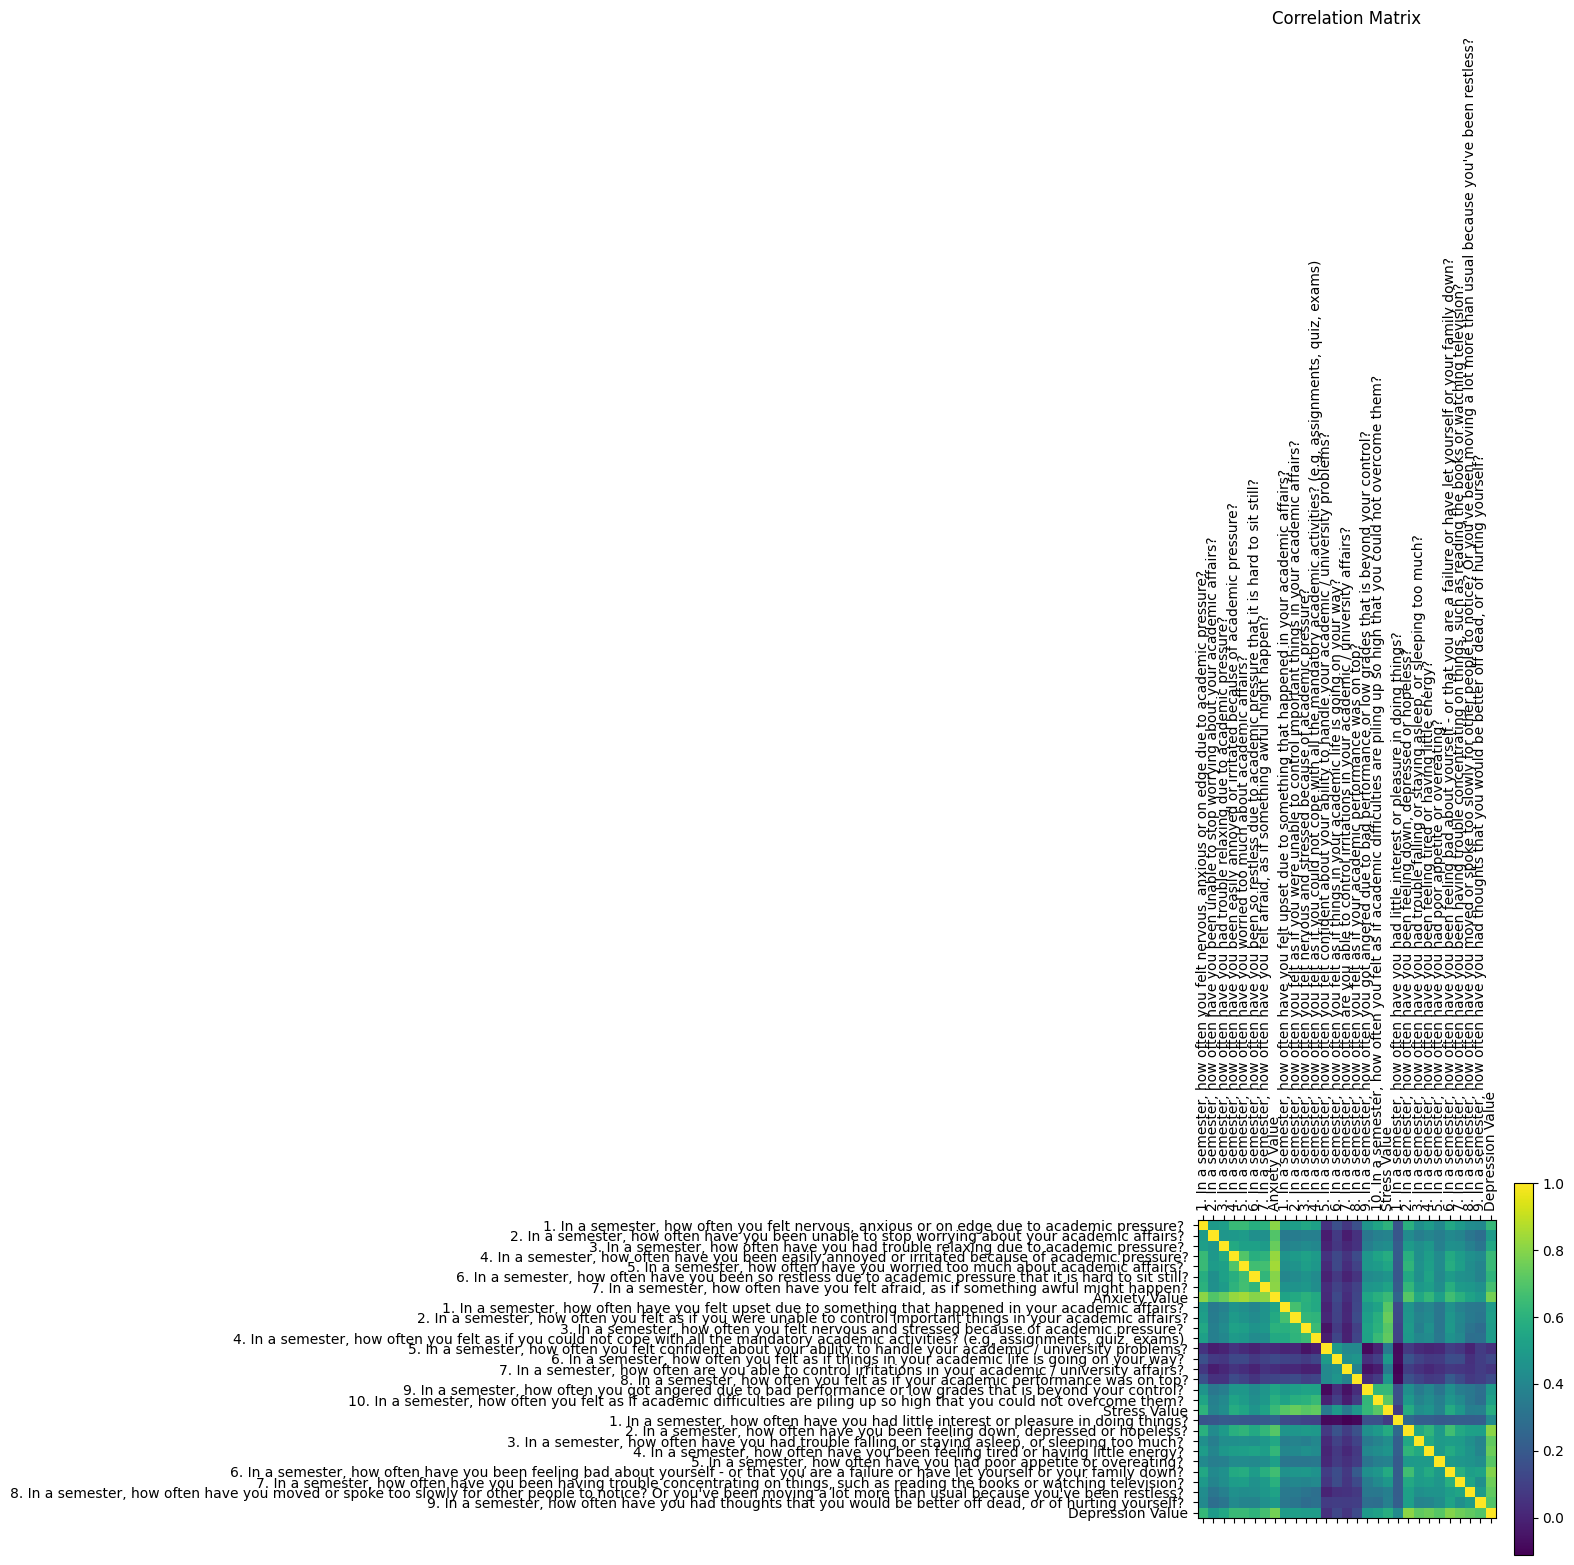

In [79]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# **Pre-Processing**

In [80]:
# Whitelist columns to keep
columns_to_keep = [
    '1. Age',
    '2. Gender',
    '5. Academic Year',
    '6. Current CGPA',
    '7. Did you receive a waiver or scholarship at your university?',
    'Anxiety Value',
    'Stress Value',
    "Depression Value",
    'Depression Label'
]

# Drop all other columns not in the whitelist
df = df[columns_to_keep]

In [81]:
df.head(5)

,1. Age,2. Gender,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,Anxiety Value,Stress Value,Depression Value,Depression Label
0,18-22,Female,Fourth Year or Equivalent,2.50 - 2.99,No,10,21,11,Moderate Depression
1,18-22,Male,First Year or Equivalent,3.80 - 4.00,No,9,18,9,Mild Depression
2,18-22,Male,First Year or Equivalent,3.00 - 3.39,No,10,23,16,Moderately Severe Depression
3,18-22,Male,First Year or Equivalent,3.40 - 3.79,No,8,20,9,Mild Depression
4,18-22,Male,First Year or Equivalent,3.40 - 3.79,No,7,20,9,Mild Depression


In [82]:
df.isnull().sum()

,0
1. Age,0
2. Gender,0
5. Academic Year,0
6. Current CGPA,0
7. Did you receive a waiver or scholarship at your university?,0
Anxiety Value,0
Stress Value,0
Depression Value,0
Depression Label,0


In [83]:
# range to numerical
cgpa_mapping = {
    'Below 2.50': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
    'Other': np.nan
}
df['CGPA_numeric'] = df['6. Current CGPA'].map(cgpa_mapping)

In [84]:
age_mapping = {
    'Below 18': 17,
    '18-22': 20,
    '23-26': 24.5
}
df['Age_numeric'] = df['1. Age'].map(age_mapping)

In [85]:
year_mapping = {
    'First Year or Equivalent': 1,
    'Second Year or Equivalent': 2,
    'Third Year or Equivalent': 3,
    'Fourth Year or Equivalent': 4
}
df['Year_numeric'] = df['5. Academic Year'].map(year_mapping)

In [86]:
depression_mapping = {
    'No Depression': 0,
    'Minimal Depression': 1,
    'Mild Depression': 2,
    'Moderate Depression': 3,
    'Moderately Severe Depression': 4,
    'Severe Depression': 5
}
df['Depression_Target'] = df['Depression Label'].map(depression_mapping)

In [87]:
# one-hot encoding
df = pd.get_dummies(df, columns=['2. Gender', '7. Did you receive a waiver or scholarship at your university?'])
df.head(1)

,1. Age,5. Academic Year,6. Current CGPA,Anxiety Value,Stress Value,Depression Value,Depression Label,CGPA_numeric,Age_numeric,Year_numeric,Depression_Target,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,7. Did you receive a waiver or scholarship at your university?_No,7. Did you receive a waiver or scholarship at your university?_Yes
0,18-22,Fourth Year or Equivalent,2.50 - 2.99,10,21,11,Moderate Depression,2.75,20.0,4.0,3,True,False,False,True,False


In [88]:
df.head(5)

,1. Age,5. Academic Year,6. Current CGPA,Anxiety Value,Stress Value,Depression Value,Depression Label,CGPA_numeric,Age_numeric,Year_numeric,Depression_Target,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,7. Did you receive a waiver or scholarship at your university?_No,7. Did you receive a waiver or scholarship at your university?_Yes
0,18-22,Fourth Year or Equivalent,2.50 - 2.99,10,21,11,Moderate Depression,2.75,20.0,4.0,3,True,False,False,True,False
1,18-22,First Year or Equivalent,3.80 - 4.00,9,18,9,Mild Depression,3.90,20.0,1.0,2,False,True,False,True,False
2,18-22,First Year or Equivalent,3.00 - 3.39,10,23,16,Moderately Severe Depression,3.20,20.0,1.0,4,False,True,False,True,False
3,18-22,First Year or Equivalent,3.40 - 3.79,8,20,9,Mild Depression,3.60,20.0,1.0,2,False,True,False,True,False
4,18-22,First Year or Equivalent,3.40 - 3.79,7,20,9,Mild Depression,3.60,20.0,1.0,2,False,True,False,True,False


In [89]:
df.shape

(1977, 16)

In [90]:
# Whitelist columns to keep
columns_to_keep = ['Depression_Target', 'Anxiety Value', 'Stress Value', 'CGPA_numeric','Age_numeric', 'Year_numeric', '2. Gender_Female',
       '2. Gender_Male', '2. Gender_Prefer not to say', "Depression Value",
       '7. Did you receive a waiver or scholarship at your university?_No',
       '7. Did you receive a waiver or scholarship at your university?_Yes'
]

# Drop all other columns not in the whitelist
df = df[columns_to_keep]

In [91]:
df.columns


Index(['Depression_Target', 'Anxiety Value', 'Stress Value', 'CGPA_numeric',
       'Age_numeric', 'Year_numeric', '2. Gender_Female', '2. Gender_Male',
       '2. Gender_Prefer not to say', 'Depression Value',
       '7. Did you receive a waiver or scholarship at your university?_No',
       '7. Did you receive a waiver or scholarship at your university?_Yes'],
      dtype='object')

In [92]:
df.drop_duplicates()
df.shape

(1977, 12)

In [93]:
df.isnull().sum()

,0
Depression_Target,0
Anxiety Value,0
Stress Value,0
CGPA_numeric,168
Age_numeric,27
Year_numeric,71
2. Gender_Female,0
2. Gender_Male,0
2. Gender_Prefer not to say,0
Depression Value,0


In [94]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [95]:
df.isnull().sum()

,0
Depression_Target,0
Anxiety Value,0
Stress Value,0
CGPA_numeric,0
Age_numeric,0
Year_numeric,0
2. Gender_Female,0
2. Gender_Male,0
2. Gender_Prefer not to say,0
Depression Value,0


In [96]:
df.drop_duplicates()
df.shape

(1977, 12)

Class Distribution:
                                                    Depression_Level  Count  \
Depression_Target                                                             
0                  (No Depression, Minimal Depression, Mild Depre...     44   
1                  (No Depression, Minimal Depression, Mild Depre...     93   
2                  (No Depression, Minimal Depression, Mild Depre...    408   
3                  (No Depression, Minimal Depression, Mild Depre...    449   
4                  (No Depression, Minimal Depression, Mild Depre...    495   
5                  (No Depression, Minimal Depression, Mild Depre...    488   

                   Percentage  
Depression_Target              
0                        2.23  
1                        4.70  
2                       20.64  
3                       22.71  
4                       25.04  
5                       24.68  


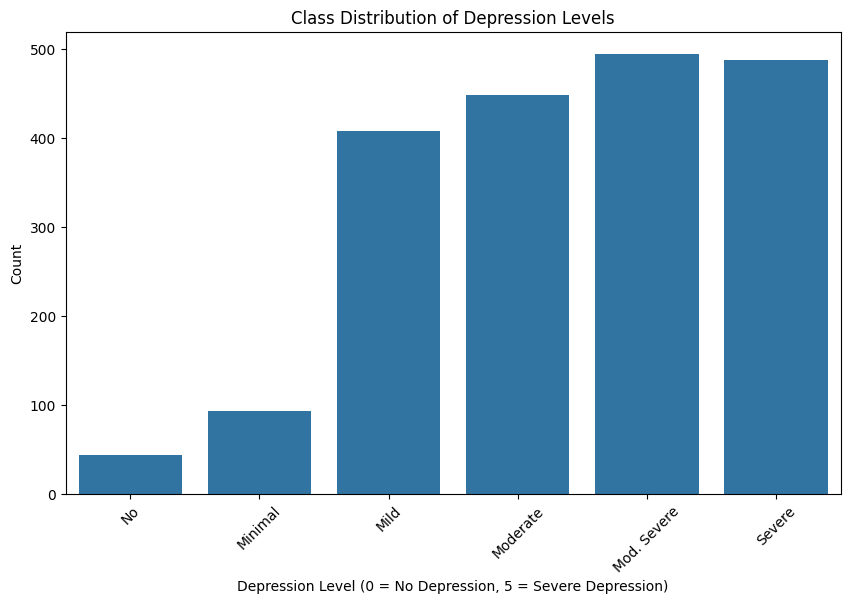

(1977, 12)

In [97]:
# Imbalance check

class_counts = df['Depression_Target'].value_counts().sort_index()

class_percentages = (class_counts / len(df) * 100).round(2)

class_distribution = pd.DataFrame({
    'Depression_Level': [depression_mapping.keys()],  # Original labels
    'Count': class_counts.values,
    'Percentage': class_percentages.values
}, index=class_counts.index)


print("Class Distribution:")
print(class_distribution)


plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of Depression Levels')
plt.xlabel('Depression Level (0 = No Depression, 5 = Severe Depression)')
plt.ylabel('Count')
plt.xticks(ticks=range(6), labels=['No', 'Minimal', 'Mild', 'Moderate', 'Mod. Severe', 'Severe'], rotation=45)
plt.show()

df.shape

In [98]:
df.head(5)

,Depression_Target,Anxiety Value,Stress Value,CGPA_numeric,Age_numeric,Year_numeric,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,Depression Value,7. Did you receive a waiver or scholarship at your university?_No,7. Did you receive a waiver or scholarship at your university?_Yes
0,3,10,21,2.75,20.0,4.0,True,False,False,11,True,False
1,2,9,18,3.90,20.0,1.0,False,True,False,9,True,False
2,4,10,23,3.20,20.0,1.0,False,True,False,16,True,False
3,2,8,20,3.60,20.0,1.0,False,True,False,9,True,False
4,2,7,20,3.60,20.0,1.0,False,True,False,9,True,False


In [99]:
df.isnull().sum()

,0
Depression_Target,0
Anxiety Value,0
Stress Value,0
CGPA_numeric,0
Age_numeric,0
Year_numeric,0
2. Gender_Female,0
2. Gender_Male,0
2. Gender_Prefer not to say,0
Depression Value,0


# MODELS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler


from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Random seed for reproducibility
np.random.seed(42)



print("Dataset shape:", df.shape)
print("\nClass distribution:")
print(df['Depression_Target'].value_counts().sort_index())
print("\nPercentage distribution:")
print(df['Depression_Target'].value_counts(normalize=True).sort_index() * 100)


X = df.drop('Depression_Target', axis=1)
y = df['Depression_Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nBefore SMOTE - training data class distribution:")
print(Counter(y_train))

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE - training data class distribution:")
print(Counter(y_train_smote))


def add_gaussian_noise(X, noise_factor=0.1):
    noise = np.random.normal(0, noise_factor, X.shape)
    X_noisy = X + noise
    return X_noisy

# Add Gaussian noise to the training data
X_train_noisy = add_gaussian_noise(X_train_smote)

print("\nAdded Gaussian noise for data augmentation")


def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n{'-'*50}\nEvaluating {model_name}\n{'-'*50}")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    weighted_precision = precision_score(y_test, y_pred, average='weighted')
    weighted_recall = recall_score(y_test, y_pred, average='weighted')
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Weighted Precision: {weighted_precision:.4f}")
    print(f"Weighted Recall: {weighted_recall:.4f}")
    print(f"Weighted F1 Score: {weighted_f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(6)],
                yticklabels=[f'Class {i}' for i in range(6)])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # For models that support feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print("\nFeature Importance:")
        print(feature_importance)

        # Plot feature importance
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()

    return {
        'model': model,
        'accuracy': accuracy,
        'precision': weighted_precision,
        'recall': weighted_recall,
        'f1': weighted_f1
    }



# Fine-tune the best performing model (assuming XGBoost performs best, but adjust based on results)
print("\n\nHyperparameter Tuning for XGBoost:")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the grid search
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_noisy, y_train_smote)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")



Dataset shape: (1977, 12)

Class distribution:
Depression_Target
0     44
1     93
2    408
3    449
4    495
5    488
Name: count, dtype: int64

Percentage distribution:
Depression_Target
0     2.225594
1     4.704097
2    20.637329
3    22.711179
4    25.037936
5    24.683864
Name: proportion, dtype: float64

Before SMOTE - training data class distribution:
Counter({4: 396, 5: 390, 3: 359, 2: 326, 1: 75, 0: 35})

After SMOTE - training data class distribution:
Counter({5: 396, 4: 396, 2: 396, 0: 396, 1: 396, 3: 396})

Added Gaussian noise for data augmentation


Hyperparameter Tuning for XGBoost:
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.8}
Best cross-validation score: 0.9179



--------------------------------------------------
Evaluating Logistic Regression
--------------------------------------------------
Accuracy: 0.9343
Weighted Precision: 0.9365
Weighted Recall: 0.9343
Weighted F1 Score: 0.9348

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.78      0.78      0.78        18
           2       0.90      0.93      0.92        82
           3       0.94      0.88      0.91        90
           4       0.96      0.97      0.96        99
           5       0.99      0.99      0.99        98

    accuracy                           0.93       396
   macro avg       0.87      0.91      0.89       396
weighted avg       0.94      0.93      0.93       396



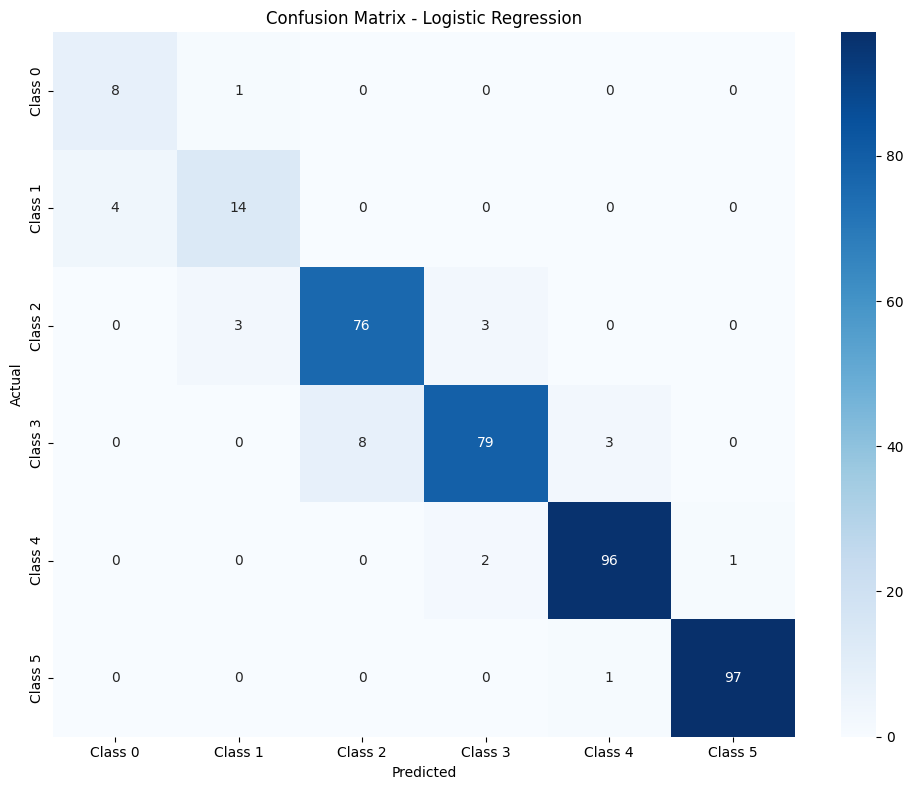


--------------------------------------------------
Evaluating XGBoost
--------------------------------------------------
Accuracy: 0.9444
Weighted Precision: 0.9499
Weighted Recall: 0.9444
Weighted F1 Score: 0.9449

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.74      0.78      0.76        18
           2       0.96      0.95      0.96        82
           3       1.00      0.86      0.92        90
           4       0.91      1.00      0.95        99
           5       1.00      1.00      1.00        98

    accuracy                           0.94       396
   macro avg       0.88      0.91      0.89       396
weighted avg       0.95      0.94      0.94       396



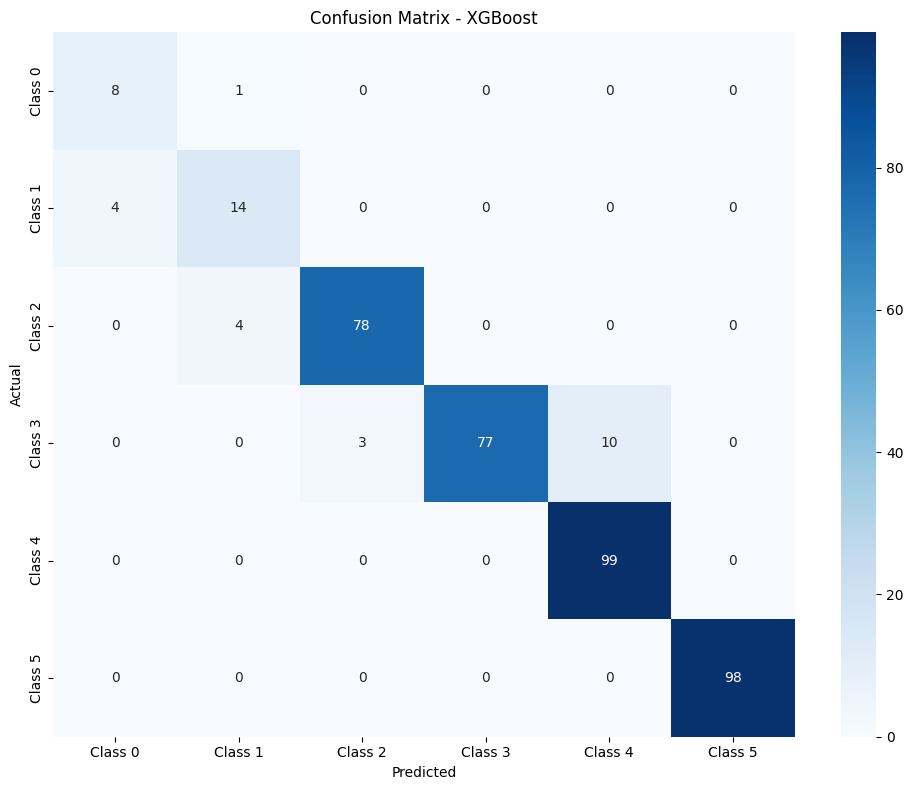


Feature Importance:
                                              Feature  Importance
8                                    Depression Value    0.760545
4                                        Year_numeric    0.030234
1                                        Stress Value    0.028990
0                                       Anxiety Value    0.028949
2                                        CGPA_numeric    0.027671
9   7. Did you receive a waiver or scholarship at ...    0.025811
3                                         Age_numeric    0.022618
7                         2. Gender_Prefer not to say    0.022502
6                                      2. Gender_Male    0.019743
5                                    2. Gender_Female    0.017596
10  7. Did you receive a waiver or scholarship at ...    0.015341


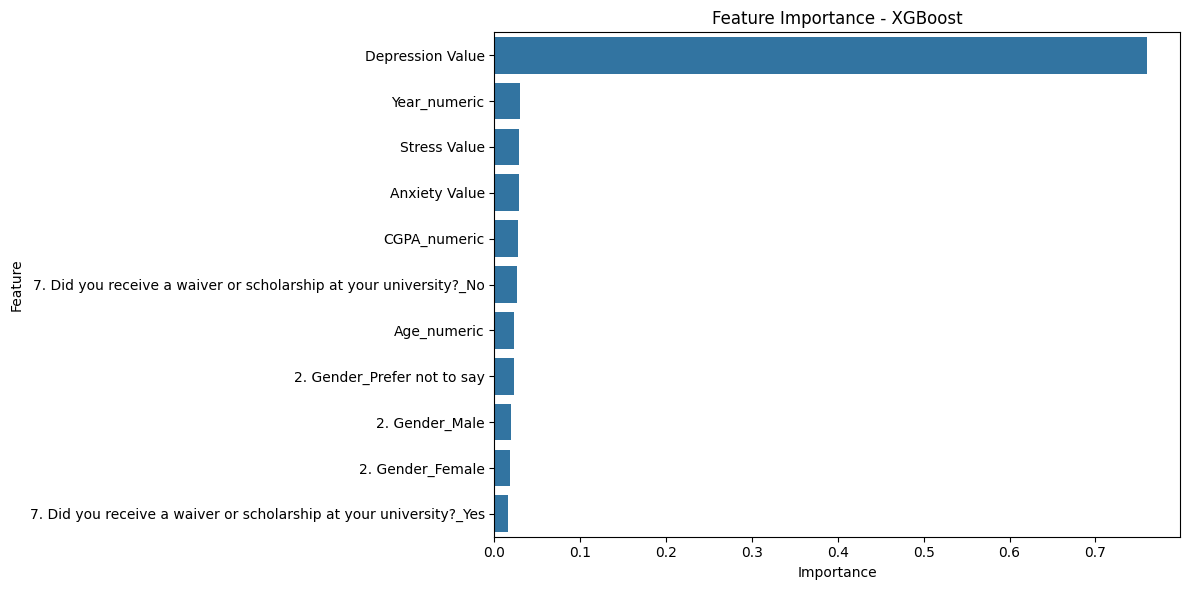


--------------------------------------------------
Evaluating Support Vector Machine
--------------------------------------------------
Accuracy: 0.8763
Weighted Precision: 0.8796
Weighted Recall: 0.8763
Weighted F1 Score: 0.8776

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.57      0.67      0.62        18
           2       0.85      0.87      0.86        82
           3       0.88      0.86      0.87        90
           4       0.90      0.91      0.90        99
           5       0.97      0.93      0.95        98

    accuracy                           0.88       396
   macro avg       0.80      0.82      0.81       396
weighted avg       0.88      0.88      0.88       396



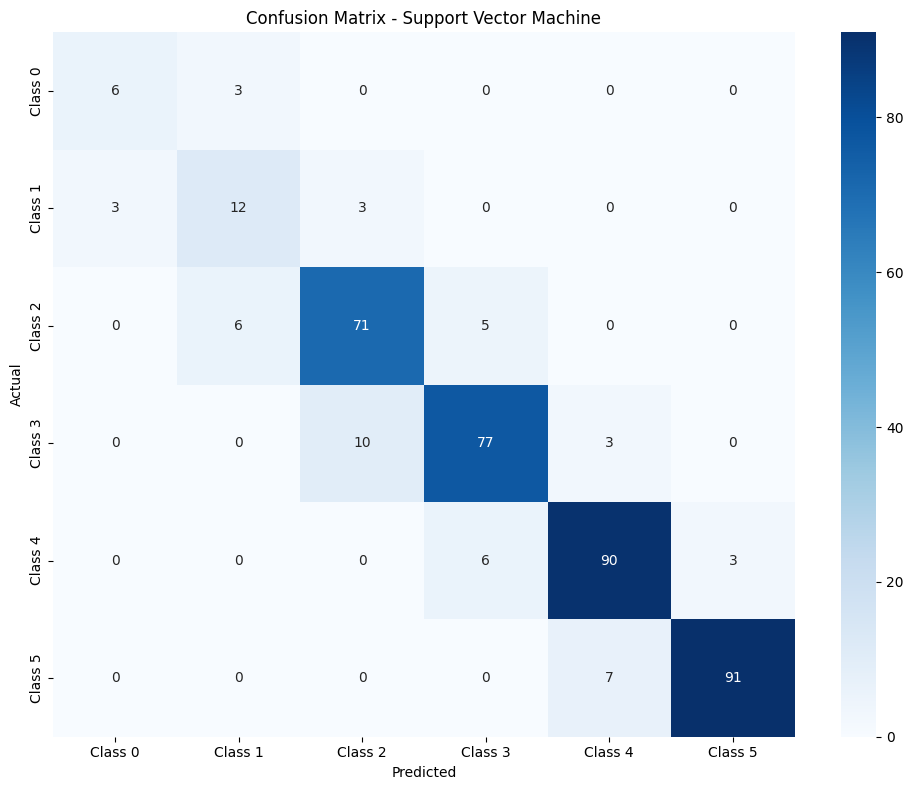


--------------------------------------------------
Evaluating K-Nearest Neighbors
--------------------------------------------------
Accuracy: 0.6742
Weighted Precision: 0.6927
Weighted Recall: 0.6742
Weighted F1 Score: 0.6803

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.38      0.67      0.48        18
           2       0.68      0.62      0.65        82
           3       0.60      0.62      0.61        90
           4       0.67      0.69      0.68        99
           5       0.89      0.78      0.83        98

    accuracy                           0.67       396
   macro avg       0.61      0.64      0.62       396
weighted avg       0.69      0.67      0.68       396



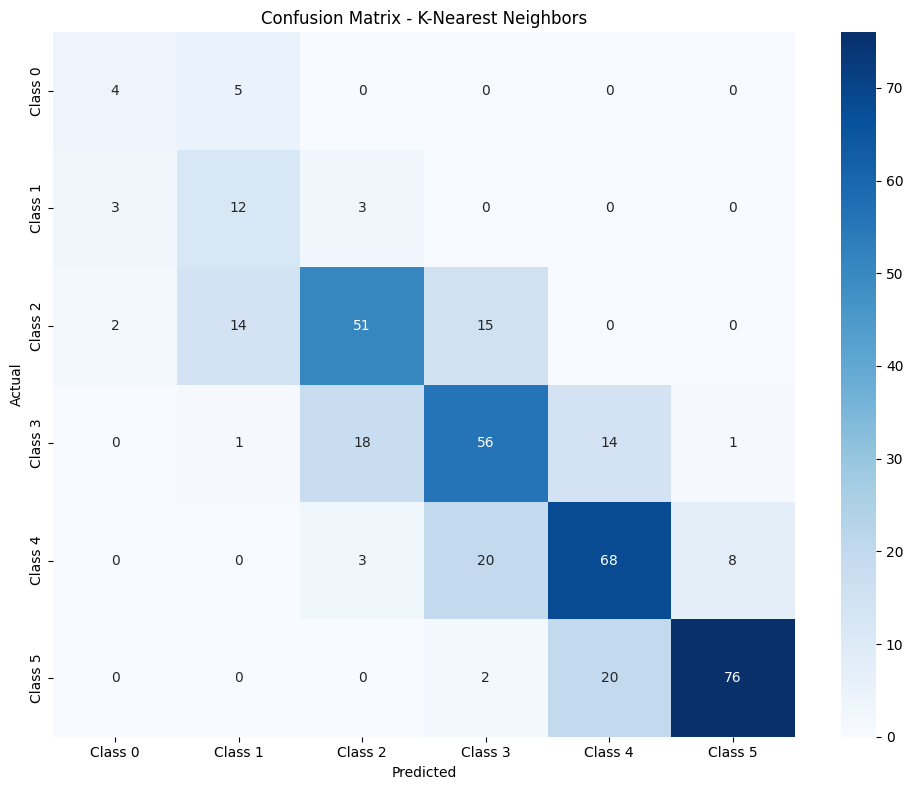


--------------------------------------------------
Evaluating Neural Network (MLP)
--------------------------------------------------
Accuracy: 0.9217
Weighted Precision: 0.9225
Weighted Recall: 0.9217
Weighted F1 Score: 0.9214

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.87      0.72      0.79        18
           2       0.92      0.93      0.92        82
           3       0.91      0.88      0.89        90
           4       0.90      0.96      0.93        99
           5       0.99      0.96      0.97        98

    accuracy                           0.92       396
   macro avg       0.90      0.89      0.89       396
weighted avg       0.92      0.92      0.92       396



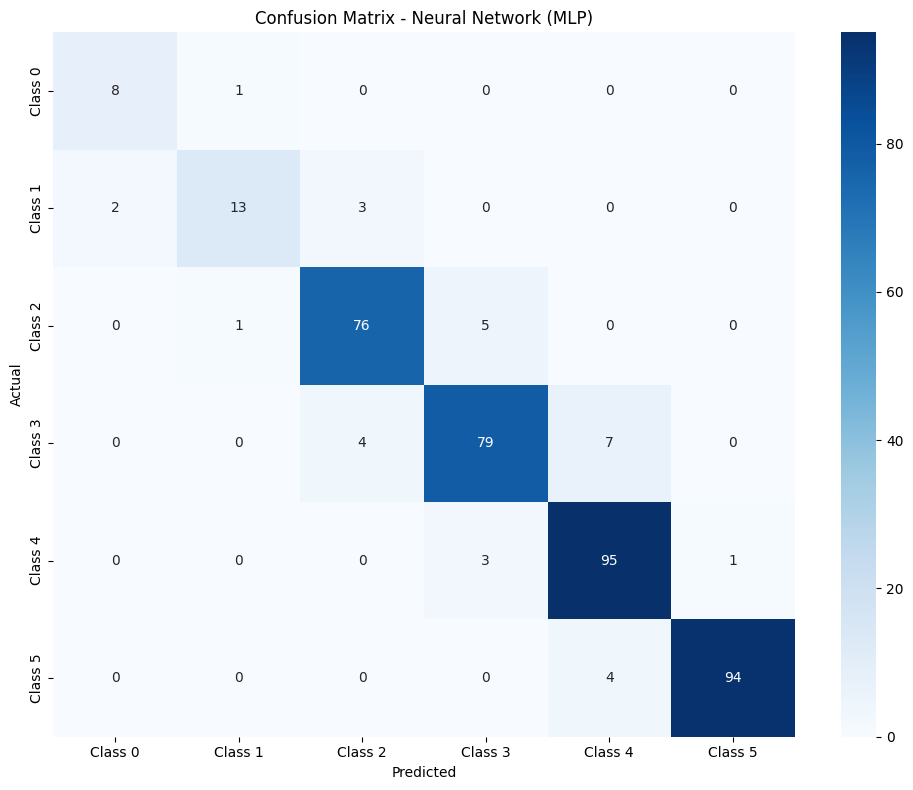



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
1              XGBoost  0.944444   0.949857  0.944444  0.944929
0  Logistic Regression  0.934343   0.936549  0.934343  0.934806
4       Neural Network  0.921717   0.922483  0.921717  0.921354
2                  SVM  0.876263   0.879590  0.876263  0.877602
3                  KNN  0.674242   0.692745  0.674242  0.680252


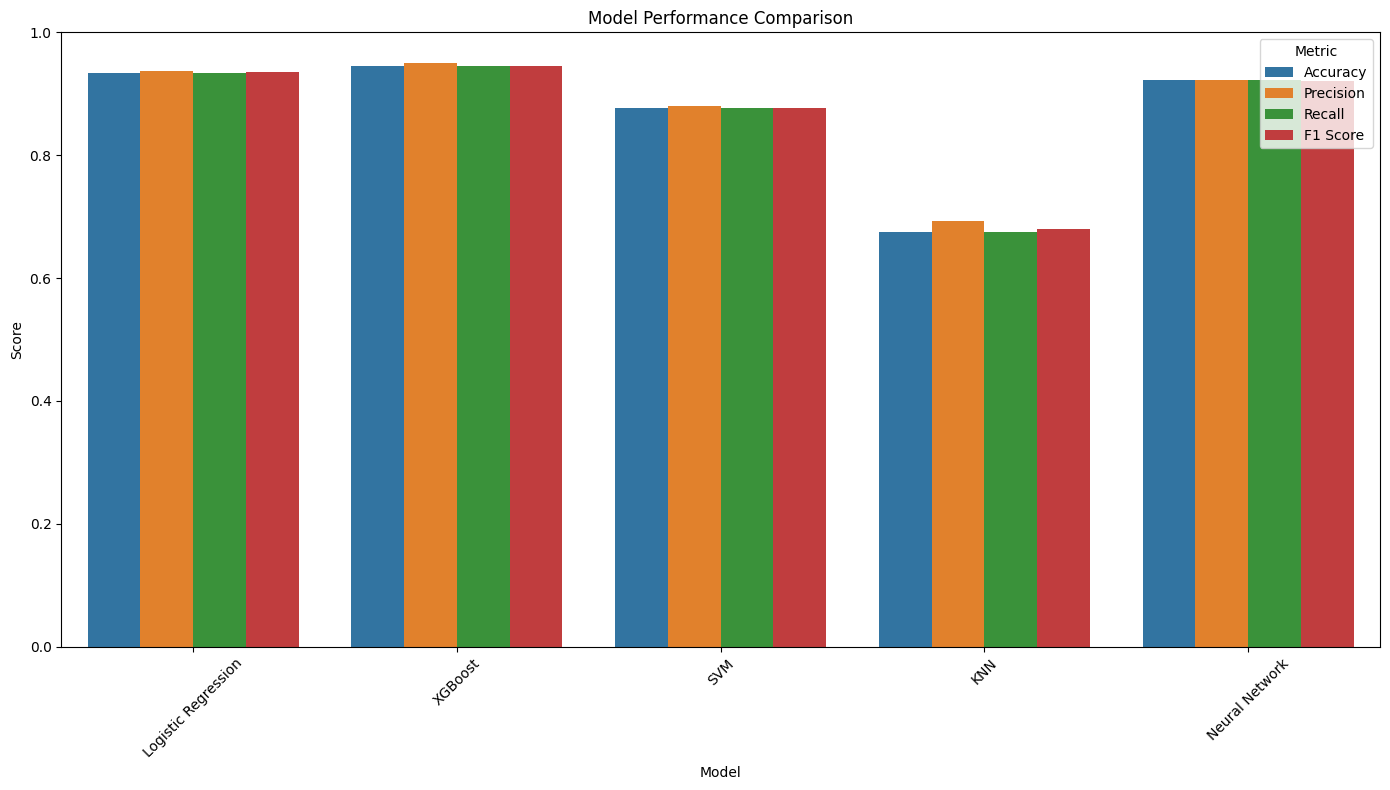

In [101]:

#  Logistic Regression
lr_model = LogisticRegression(max_iter=1000, C=1.0, random_state=42, multi_class='multinomial', solver='lbfgs')
lr_results = evaluate_model(lr_model, X_train_noisy, y_train_smote, X_test_scaled, y_test, "Logistic Regression")

#  XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

xgb_results = evaluate_model(xgb_model, X_train_noisy, y_train_smote, X_test_scaled, y_test, "XGBoost")

#  Support Vector Machine
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_results = evaluate_model(svm_model, X_train_noisy, y_train_smote, X_test_scaled, y_test, "Support Vector Machine")

#  K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train_noisy, y_train_smote, X_test_scaled, y_test, "K-Nearest Neighbors")

#  Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                         max_iter=300, random_state=42)
mlp_results = evaluate_model(mlp_model, X_train_noisy, y_train_smote, X_test_scaled, y_test, "Neural Network (MLP)")

# Model Comparison
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'SVM', 'KNN', 'Neural Network'],
    'Accuracy': [lr_results['accuracy'], xgb_results['accuracy'],
                svm_results['accuracy'], knn_results['accuracy'], mlp_results['accuracy']],
    'Precision': [lr_results['precision'], xgb_results['precision'],
                 svm_results['precision'], knn_results['precision'], mlp_results['precision']],
    'Recall': [lr_results['recall'], xgb_results['recall'],
              svm_results['recall'], knn_results['recall'], mlp_results['recall']],
    'F1 Score': [lr_results['f1'], xgb_results['f1'],
                svm_results['f1'], knn_results['f1'], mlp_results['f1']]
})

print("\n\nModel Comparison:")
print(models_comparison.sort_values('F1 Score', ascending=False))


plt.figure(figsize=(14, 8))
models_comparison_melted = pd.melt(models_comparison, id_vars=['Model'],
                                  value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                                  var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=models_comparison_melted)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()